### 目录
1. 导入包
2. 载入VGG16模型
3. 搭建全连接层
4. 将二者拼接起来
5. 测试

#### 导入包

In [3]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import img_to_array, array_to_img, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### 载入VGG16模型
载入的是没有全连接层的模型。

In [4]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

#### 搭建全连接层
因为上面使用的是没有全连接层的VGG16，所以需要自己搭建全连接层。

In [5]:
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16_model.output_shape[1:], name='flatten'))
top_model.add(Dense(units=256, activation='relu', name='fc_1'))
top_model.add(Dropout(rate=0.5, name='dropout_1'))
top_model.add(Dense(units=2, activation='softmax', name='output_0'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### 将二者拼接起来

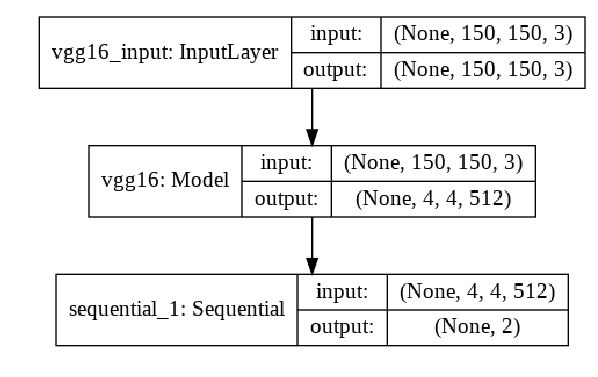

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
{'cat': 0, 'dog': 1}

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
13/13 [==============================] - 17s 1s/step - loss: 0.9292 - acc: 0.4666 - val_loss: 0.7328 - val_acc: 0.5150
Epoch 2/30
13/13 [==============================] - 7s 504ms/step - loss: 0.7815 - acc: 0.5432 - val_loss: 0.6592 - val_acc: 0.6000
Epoch 3/30
13/13 [==============================] - 7s 501ms/step - loss: 0.7405 - acc: 0.5599 - val_loss: 0.6350 - val_acc: 0.6450
Epoch 4/30
13/13 [==============================] - 7s 501ms/step - loss: 0.6564 - acc: 0.6057 - val_loss: 0.6043 - val_acc: 0.6900
Epoch 5/30
13/13 [==============================] - 7s 503ms/step - loss: 0.6311 - acc: 0.6221 - val_loss: 0.5719 - val_acc: 0.7450
Epoch 6/30
13/13 [==============================] - 7s 505ms/step - loss: 0.6188 - acc: 0.6706 - val_loss: 0.5479 - val_acc: 0.7150
Epoch 7/30
1

In [6]:
model = Sequential()
model.add(vgg16_model)
model.add(top_model)
# model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
## Adam的优化效果非常差，所以使用SGD

# 模型的结构图: 只会显示两层
plot_model(model, to_file='vgg16.png', show_shapes=True)
plt.figure(figsize=(10,10))
img = plt.imread('vgg16.png')
plt.imshow(img)
plt.axis('off')
plt.show()

train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=20, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest', rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

batch_size = 32
train_generator = train_datagen.flow_from_directory('image/train', target_size=(150,150), batch_size=batch_size)
test_generator = test_datagen.flow_from_directory('image/test', target_size=(150,150), batch_size=batch_size)

print(train_generator.class_indices)

# 【model.compile()这句命令只能放在图像增强后面，放在前面准确率不会提升】
model.compile(optimizer=SGD(lr=1e-4, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=30, 
          validation_data=test_generator, validation_steps=len(test_generator)
          )
model.save('models/vgg16_model.h5')

#### 测试

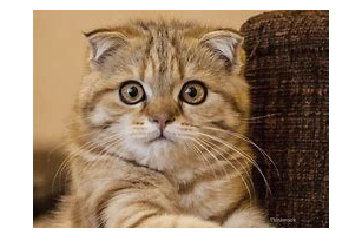

(1, 150, 150, 3)
['cat']


In [14]:
from keras.models import load_model
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

model = load_model('models/vgg16_model.h5')

img = load_img('test_cat.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

label = np.array(['cat', 'dog'])
img = img.resize((150,150))
img = img_to_array(img)/255
img = np.expand_dims(img, 0)
print(img.shape)
# model.predict_classes(img)
print(label[model.predict_classes(img)])